## Setup

In [1]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached python_dotenv-1.0.1-py3-none-any.whl.metadata (23 kB)
Using cached python_dotenv-1.0.1-py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.Collecting llmx
  Using cached llmx-0.0.21a0-py3-none-any.whl.metadata (8.9 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached parameterized-0.9.0-py2.py3-none-any.whl.metadata (18 kB)
INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ---------------------------------------- 149.4/149.4 kB ? eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached typing_extensions-4.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.1 MB 31.1 MB/s eta 0:00:01
   ------ --------------------------------- 3.2/19.1 MB 41.5 MB/s eta 0:00:01
   ---------------- ----------------------- 7.8/19.1 MB 62.3 MB/s eta 0:00:01
   --------------------------- ------------ 13.3/19.1 MB 110.0 MB/s eta 0:00:01
   -------------------------------------- - 18.5/19.1 MB 131.2 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 93.0 MB/s eta 0:00:00
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload
%autoreload 2

In [162]:
import sys
import os
import pprint
import pickle
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
sys.path.append(os.path.abspath('../..'))

In [6]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\User\AppData\Local\sagemaker\sagemaker\config.yaml


In [7]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv("APIKEY")))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

In [83]:
import pandas as pd

df = pd.read_csv('../customer_shopping_data_original.csv')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [84]:
df.to_csv('../customer_shopping_data.csv', index=False)


## Summarizer Module
- `data*`: filepath to csv file 
- `description`: description of each column of the dataset (manually inputted)
- `file_name`: file name of the dataset
- `n_samples`: number of samples you want for each column
- `textgen_config`: llm config
    - `textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)`
    - View other settings [here](https://github.com/victordibia/llmx/blob/main/notebooks/tutorial.ipynb")
- `summary_method`: mode of summarizing
    - `default`: summarizes each column only. 
    - `enrich`: uses the llm to generate descriptions for every column and for the dataset
    - `describe`: takes in user input to add descriptions to the summary

### Summarize the columns
- Input: dataset
- Summary method: default
- Output: dict of information about the dataset, containing descriptions of each column

In [85]:
summary = lida.summarize("../customer_shopping_data.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

{'dataset_description': '',
 'field_names': ['invoice_no',
                 'customer_id',
                 'gender',
                 'age',
                 'category',
                 'quantity',
                 'price',
                 'payment_method',
                 'invoice_date',
                 'shopping_mall'],
 'fields': [{'column': 'invoice_no',
             'properties': {'description': '',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4500,
                            'samples': ['I184889', 'I327605', 'I713192'],
                            'semantic_type': ''}},
            {'column': 'customer_id',
             'properties': {'description': '',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4500,
                            'samples': ['C223713', 'C438256', 'C206520'],
   

### Enrich: Automatically generate descriptions for each column
- Input: dataset
- Summary method: enrich
- Output: Summarized dataset with generated descriptions

In [158]:
enriched_summary = lida.summarize("../customer_shopping_data.csv", summary_method="enrich", textgen_config=textgen_config)  
pprint.pprint(enriched_summary)

{'dataset_description': 'This dataset contains transaction details from a '
                        'retail shopping environment, capturing customer '
                        'demographics, purchase details, and payment methods '
                        'over a specified period.',
 'field_names': ['invoice_no',
                 'customer_id',
                 'gender',
                 'age',
                 'category',
                 'quantity',
                 'price',
                 'payment_method',
                 'invoice_date',
                 'shopping_mall'],
 'fields': [{'column': 'invoice_no',
             'properties': {'description': 'Unique identifier for each '
                                           'transaction invoice.',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4500,
                            'samples': ['I152627', 'I164618', 'I802776'],
                

### Describe: Manually add descriptions for each column
- Input: dataset, dict of dataset descriptions
- Summary method: describe
- Output: dict of information about the dataset, containing descriptions of each column

In [87]:
description = {
    "dataset_description": "Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!",
    "columns" : {
        "invoice_no": "Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.",
        "customer_id": "Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.",
        "gender": "String variable of the customer's gender.",
        "age": "Positive Integer variable of the customers age.",
        "category": "String variable of the category of the purchased product.",
        "quantity": "The quantities of each product (item) per transaction. Numeric.",
        "price": "Unit price. Numeric. Product price per unit in Turkish Liras (TL).",
        "payment_method": "String variable of the payment method (cash, credit card or debit card) used for the transaction.",
        "invoice_date": "Invoice date. The day when a transaction was generated.",
        "shopping_mall": "String variable of the name of the shopping mall where the transaction was made."
    }
}

In [88]:
described_summary = lida.summarize("../customer_shopping_data.csv", description=description, summary_method="describe", textgen_config=textgen_config)  
pprint.pprint(described_summary)

{'dataset_description': 'Welcome to the shopping world of Istanbul! Our '
                        'dataset contains shopping information from 10 '
                        'different shopping malls between 2021 and 2023. We '
                        'have gathered data from various age groups and '
                        'genders to provide a comprehensive view of shopping '
                        'habits in Istanbul. The dataset includes essential '
                        'information such as invoice numbers, customer IDs, '
                        'age, gender, payment methods, product categories, '
                        'quantity, price, order dates, and shopping mall '
                        'locations. We hope that this dataset will serve as a '
                        'valuable resource for researchers, data analysts, and '
                        'machine learning enthusiasts who want to gain '
                        'insights into shopping trends and patterns in '
       

## Goal Generator Module
- `summary*`: Summary from the summarizer
- `n`: Number of goals you want to generate
- `explore`: List of data types you want the goals to explore. 
    - `category`: Variables which are string or categories
    - `number`: Variables which are numerical (int, float)
    - `date`: Variables which are datetime
    - `three`: Mix of three or more variables
    - `two`: Mix of two variables
- `persona`: Description of your goal in exploring the dataset
- `insights`: List of insights you want to generate goals for
- `textgen_config`: llm config

### Generate goals (without specifications)
For this use case, we want goals that will let us openly explore our dataset without anything in mind. We do not specify data types we want to explore or any persona.

In [51]:
goals_bare_min = lida.goals(summary, n=3, textgen_config=textgen_config, explore=[])

for goal in goals_bare_min:
    display(goal)


### Goal 0
---
**Question:** What is the average price of products purchased by gender?

**Visualization:** `bar chart of average price grouped by gender`

**Rationale:** This visualization will show the average price of products purchased by each gender, using the 'price' and 'gender' fields. It helps in understanding gender-based spending patterns, which can inform targeted marketing strategies.



### Goal 1
---
**Question:** How does the quantity of products purchased vary by category?

**Visualization:** `bar chart of total quantity grouped by category`

**Rationale:** This visualization will display the total quantity of products purchased for each category, utilizing the 'quantity' and 'category' fields. It provides insights into consumer preferences and can guide inventory decisions.



### Goal 2
---
**Question:** What are the trends in shopping frequency over time?

**Visualization:** `line chart of invoice count over time grouped by invoice_date`

**Rationale:** This visualization will show the number of invoices over time, leveraging the 'invoice_date' field. It helps in identifying trends in shopping frequency, which can be useful for understanding seasonality and planning promotions.


### Generate goals that guarantees the exploration of specific data types and/or number of variables
For this use case, we want to specify that we want certain data types to be explored in our goal exploration. This will guarantee that there will be goals that exist that contain the data types we specify. Note that this does not mean that ALL goals will be constricted to the data types you specify. It only means that you want certain data types to be explored, but other goals will be generated as well.

We can populate the `explore` dataset with the data types we want to explore. We can also put `three` if we want to generate goals that will suggest visualizations for `three` different variables.

Note below that we see goals that include `date` columns and that there are goals that mix `three` variables.

In [52]:
goals_explore = lida.goals(summary, n=5, explore=['date', 'three'], textgen_config=textgen_config)

for goal in goals_explore:
    display(goal)


### Goal 0
---
**Question:** How does the average price of items purchased vary over time?

**Visualization:** `Line chart of average price grouped by invoice_date`

**Rationale:** This visualization will show trends in average spending over time, allowing us to identify any seasonal patterns or shifts in consumer behavior. By grouping the data by 'invoice_date' and calculating the average 'price', we can gain insights into how pricing strategies may affect customer purchasing decisions throughout the specified date range from '1/1/2021' to '9/9/2022'. A line chart is chosen here as it effectively illustrates changes over time, making it easy to spot trends.



### Goal 1
---
**Question:** How does the average price of products differ by gender and shopping mall?

**Visualization:** `bar chart of average(price) grouped by gender and shopping_mall`

**Rationale:** This visualization will provide insights into spending patterns based on gender across different shopping malls. By aggregating the average price of products purchased (price) and grouping it by both gender and shopping_mall, we can identify if certain malls attract higher spending from a specific gender. A bar chart is chosen here as it effectively compares the average prices across multiple categories, making it easy to discern trends and differences.



### Goal 2
---
**Question:** What is the average price of products purchased by gender?

**Visualization:** `bar chart of average price grouped by gender`

**Rationale:** This visualization will show the average price of products purchased by each gender, using the 'price' and 'gender' fields. It helps in understanding gender-based spending patterns, which can inform targeted marketing strategies.



### Goal 3
---
**Question:** How does the quantity of products purchased vary by category?

**Visualization:** `bar chart of total quantity grouped by category`

**Rationale:** This visualization will display the total quantity of products purchased for each category, utilizing the 'quantity' and 'category' fields. It provides insights into consumer preferences and can guide inventory decisions.



### Goal 4
---
**Question:** What are the trends in shopping frequency over time?

**Visualization:** `line chart of invoice count over time grouped by invoice_date`

**Rationale:** This visualization will show the number of invoices over time, leveraging the 'invoice_date' field. It helps in identifying trends in shopping frequency, which can be useful for understanding seasonality and planning promotions.


### Generate goals with a persona
For this use case, we want to specify our goal for our EDA so that LIDA can generate goals that will allow us to achieve our goal. 
Note below that we can see that the goals are tailored for our specific goal, more so than if we do not specify the persona.

In [56]:
persona = "A data analyst from Mall of Istanbul who wants to create a marketing strategy to promote the use of credit cards in the Mall of Istanbul"
goals_persona = lida.goals(summary, n=3, persona=persona, textgen_config=textgen_config, explore=[])

for goal in goals_persona:
    display(goal)


### Goal 0
---
**Question:** What is the average price of items purchased using credit cards compared to other payment methods at Mall of Istanbul?

**Visualization:** `bar chart of average(price) grouped by payment_method`

**Rationale:** This visualization will help us understand how credit card users differ in spending compared to cash and debit card users. By grouping the average price by payment_method, we can identify if promoting credit card usage could lead to higher sales per transaction.



### Goal 1
---
**Question:** How does the quantity of items purchased vary by gender at Mall of Istanbul?

**Visualization:** `bar chart of sum(quantity) grouped by gender`

**Rationale:** This visualization will reveal purchasing behavior differences between male and female customers. Understanding the quantity of items purchased by gender can help tailor marketing strategies to engage both demographics more effectively, especially if there are significant differences.



### Goal 2
---
**Question:** Which product categories are most popular among credit card users at Mall of Istanbul?

**Visualization:** `bar chart of count(invoice_no) grouped by category filtered by payment_method = 'Credit Card'`

**Rationale:** This visualization will identify which categories attract credit card users, allowing for targeted promotions in those areas. By counting the number of invoices grouped by category for credit card transactions, we can infer which products might benefit from marketing campaigns aimed at increasing credit card usage.


### Generate goals related to an insight
For this use case, we have an insight about our data that we want to explore further. Note that the goals generated are now related to the insight that we provided.

In [60]:
goals_insight = lida.goals(summary, n=3, insights=["It looks like females tend to want to go to specific malls more than others"], textgen_config=textgen_config, explore=[])

for goal in goals_insight:
    display(goal)

Insight(insight='It looks like females tend to want to go to specific malls more than others', prompts=[], answers=[], index=0)



### Goal 0
---
**Question:** How does the average quantity purchased by females compare across different shopping malls?

**Visualization:** `bar chart of average(quantity) grouped by shopping_mall, filtered by gender = 'Female'`

**Rationale:** This is crucial because it will help us understand if there are specific malls where female customers tend to buy more items. Using this visualization will show if females typically purchase larger quantities compared to other malls, validating the insight about their preferences.



### Goal 1
---
**Question:** What is the average price of items purchased by females in comparison to males across different categories?

**Visualization:** `bar chart of average(price) grouped by category, filtered by gender`

**Rationale:** This is important as it will reveal if there are significant differences in spending behavior between genders. By examining the average price of items purchased, we can determine if females are willing to spend more in certain categories, which may explain their mall preferences.



### Goal 2
---
**Question:** How does the frequency of visits to specific malls differ between age groups of female customers?

**Visualization:** `bar chart of count(invoice_no) grouped by shopping_mall and age, filtered by gender = 'Female'`

**Rationale:** This visualization will help us identify which age groups of female customers prefer certain malls, providing insights into demographic trends. Understanding these preferences can further explain the insight regarding females' tendency to visit specific malls.


## Viz Generator Module
- `summary*`: Summary of the dataset
- `goal*`: Goal that you want to make a visualization for
- `library`: Python library you want to use
    - `seaborn` (default)
    - `altair`
    - `plotly`
    - `matplotlib`
    - `ggplot`
- `textgen_config`: llm config

### Generate a visualization from a goal

For this use case, we select a goal that was generated previously. The goal is:

**Question:** Which product categories are most popular among credit card users at Mall of Istanbul?

**Visualization:** `bar chart of count(invoice_no) grouped by category filtered by payment_method = 'Credit Card'`

**Rationale:** This visualization will identify which categories attract credit card users, allowing for targeted promotions in those areas. By counting the number of invoices grouped by category for credit card transactions, we can infer which products might benefit from marketing campaigns aimed at increasing credit card usage.



<string>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



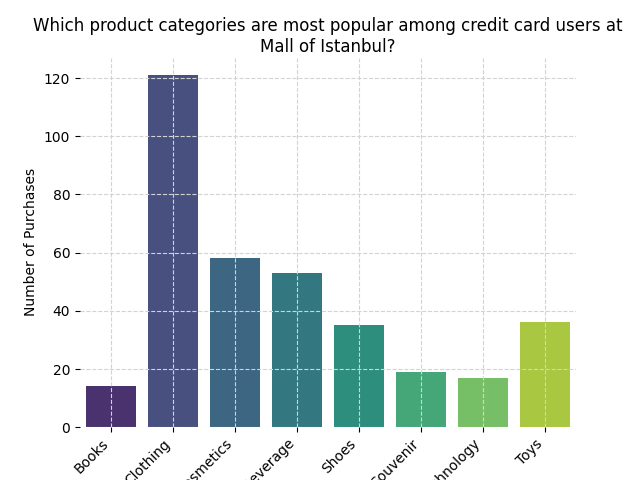

In [66]:
goal_charts = lida.visualize(summary=summary, goal=goals_persona[2], textgen_config=textgen_config)  
goal_charts[0]

### Generate a visualization from a custom prompt

For this use case, we provide our own prompt that we want to create a chart with. This works with different types of prompts as well:
1. High-level
2. Low-level

<string>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



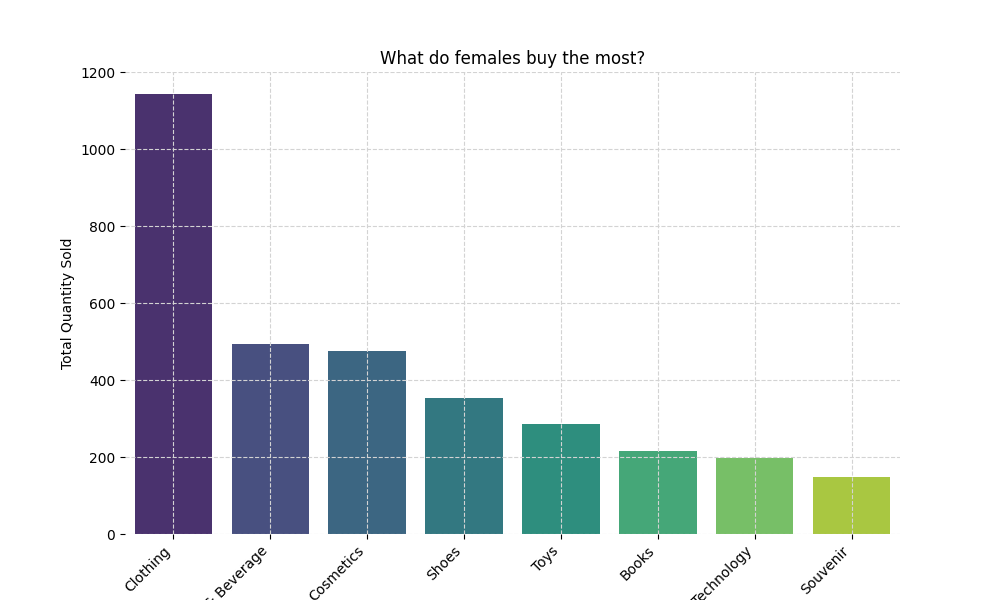

In [67]:
custom_chart = lida.visualize(summary=summary, goal="What do females buy the most?", textgen_config=textgen_config)  
custom_chart[0]

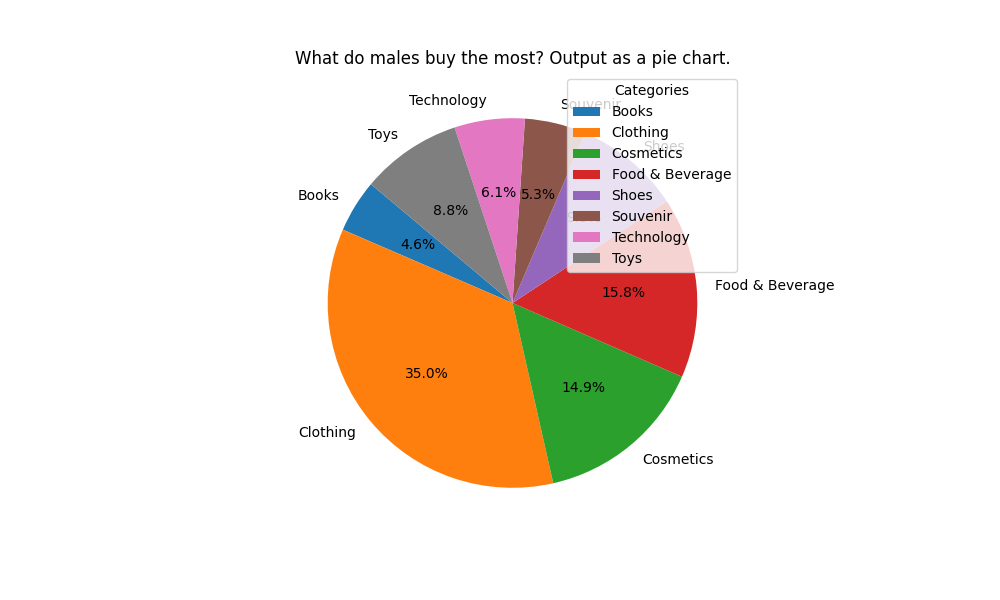

In [98]:
custom_chart2 = lida.visualize(summary=summary, goal="What do males buy the most? Output as a pie chart.", textgen_config=textgen_config)  
custom_chart2[0]

### Edit a visualization
Given a visualization, we have the option to edit it as well to match our specifications. There will be cases when the chart generated is not easily readable. This will be useful to manipulate it if there is something specific that you want to see.

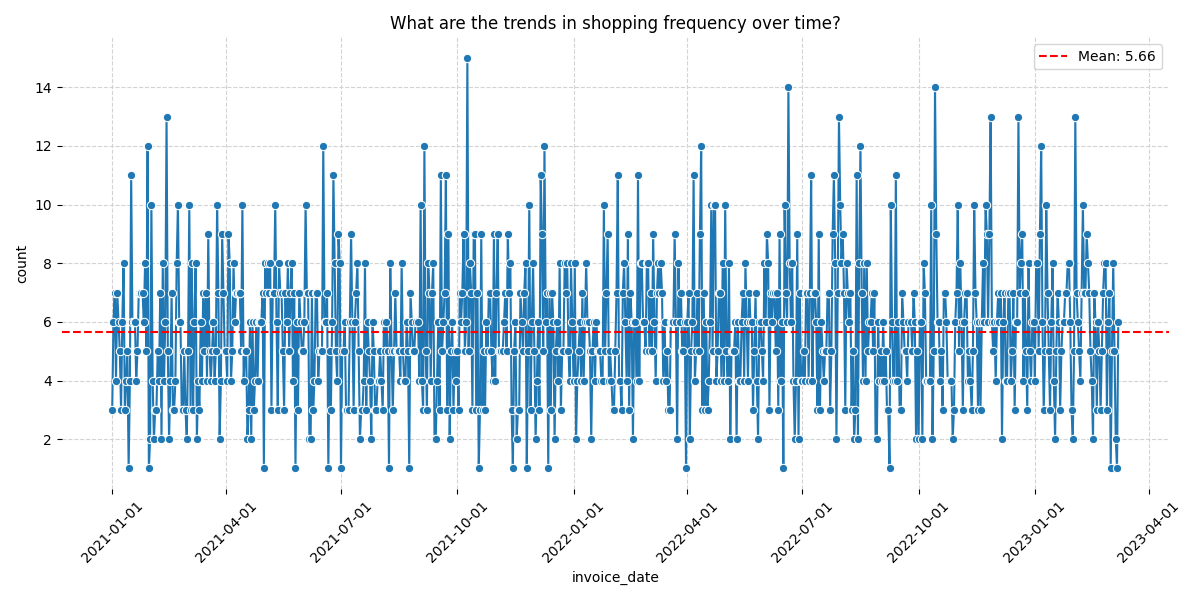

In [89]:
goal_charts2 = lida.visualize(summary=summary, goal=goals_bare_min[2], textgen_config=textgen_config)  
goal_charts2[0]

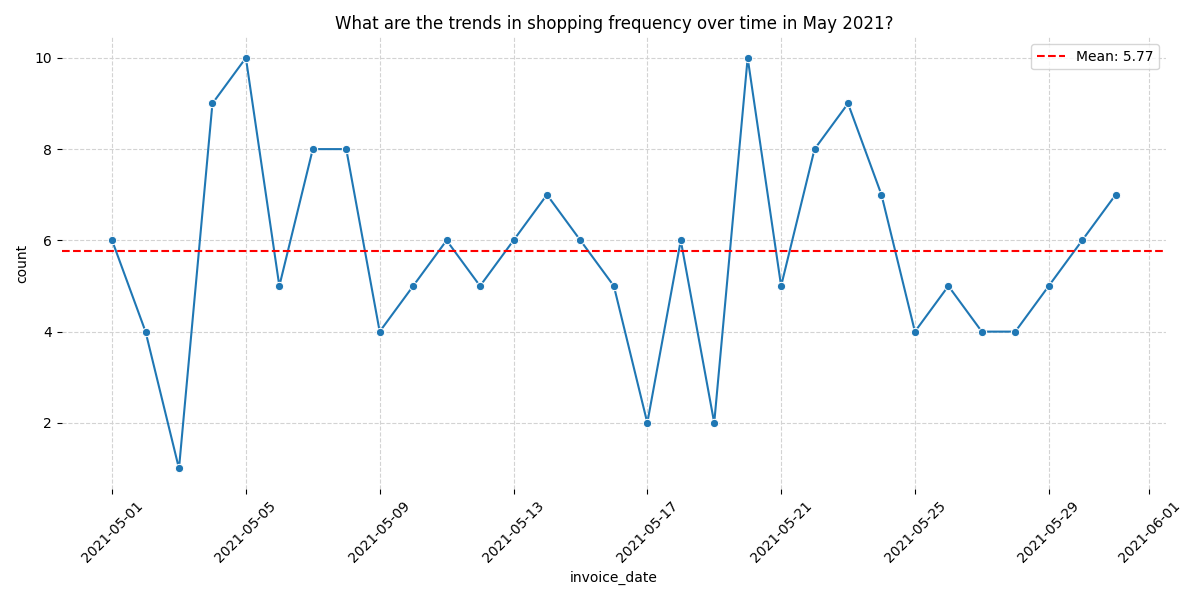

In [191]:
goal_charts2_code = goal_charts2[0].code
instructions = ["focus on May 2021"]
edited_charts = lida.edit(code=goal_charts2_code,  summary=summary, instructions=instructions, textgen_config=textgen_config)
edited_charts[0]

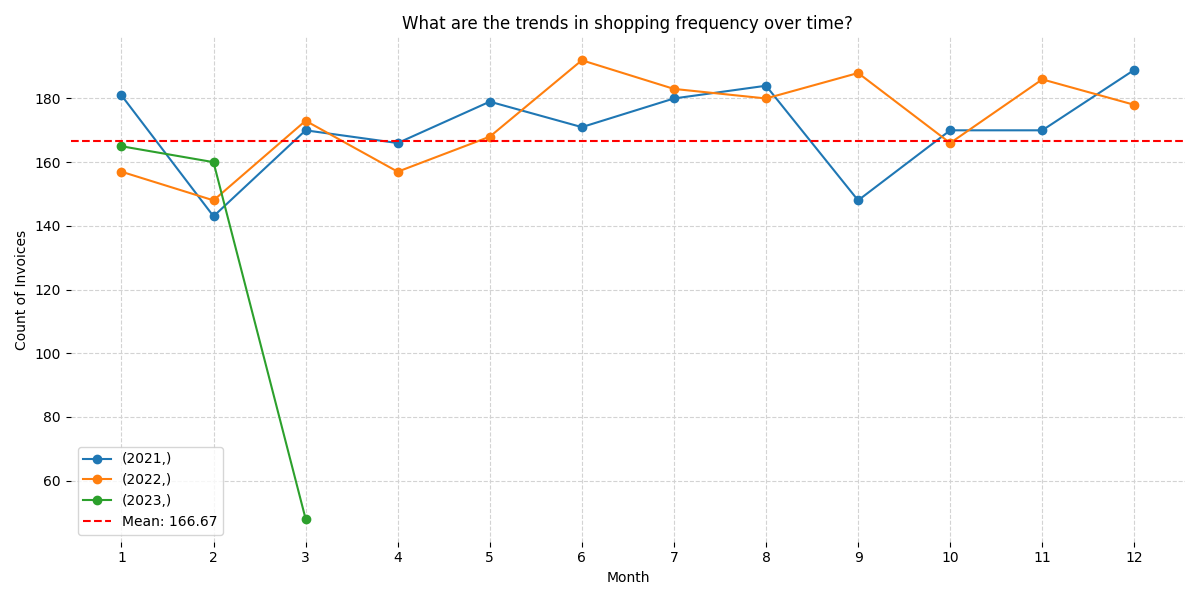

In [181]:
goal_charts2_code = goal_charts2[0].code
instructions = ["separate the years into different line charts", "make the x-axis the months from 1-12"]
edited_charts2 = lida.edit(code=goal_charts2_code,  summary=summary, instructions=instructions, textgen_config=textgen_config)
edited_charts2[0]

In [104]:
feedback = lida.evaluate(code = goal_charts2_code, goal=goals_bare_min[2], textgen_config=textgen_config)
print(feedback)

[[{'dimension': 'bugs', 'score': 10, 'rationale': 'There are no bugs, logic errors, syntax errors, or typos in the code. The code compiles and runs as intended.'}, {'dimension': 'transformation', 'score': 10, 'rationale': "The data is transformed appropriately by converting 'invoice_date' to datetime, dropping NaT values, and grouping by date to count invoices. This is suitable for analyzing trends over time."}, {'dimension': 'compliance', 'score': 10, 'rationale': 'The code effectively meets the specified visualization goal of showing trends in shopping frequency over time through a line plot.'}, {'dimension': 'type', 'score': 10, 'rationale': 'A line plot is an appropriate visualization type for showing trends over time, as it effectively conveys changes in shopping frequency.'}, {'dimension': 'encoding', 'score': 10, 'rationale': "The data is encoded appropriately, with 'invoice_date' on the x-axis and 'count' on the y-axis, which aligns with the visualization's intent."}, {'dimensi

## Prompter Module

Given a visualization or goal that you want to explore, you can use the prompter module to ask you questions about the visualization to guide your analysis
- `goal*`: Goal or visualization that you want to explore
- `n`: Number of prompts that you want to answer about your visualization
- `textgen_config`: llm config

In [112]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goals_bare_min_prompts = lida.prompt(goals_bare_min[2], textgen_config=textgen_config, n=5)  

for prompt in goals_bare_min_prompts:
    display(prompt)


### Prompt 0
---
**Question:** What time periods show the highest increase or decrease in shopping frequency?

**Rationale:** Understanding the specific time frames where shopping frequency fluctuates can help identify potential seasonal effects or the impact of marketing campaigns.




### Prompt 1
---
**Question:** Are there any recurring seasonal patterns in shopping frequency?

**Rationale:** Identifying any regular seasonal trends can be crucial for inventory management and promotional planning.




### Prompt 2
---
**Question:** How do shopping frequencies compare across different months or quarters?

**Rationale:** This comparison can reveal significant differences in consumer behavior across timeframes, which informs budgeting and resource allocation.




### Prompt 3
---
**Question:** What was the impact of specific promotional events on shopping frequency?

**Rationale:** Analyzing spikes in invoice counts during promotional periods can provide insights into the effectiveness of marketing strategies.




### Prompt 4
---
**Question:** How does the trend in shopping frequency correlate with external factors (e.g., economic indicators, holidays)?

**Rationale:** Understanding external influences on shopping frequency can give a broader context to the data trends, enhancing the predictive power of future analysis.



In [156]:
goals_bare_min_answers=[
    "In 2021, the highest decrease happens from June to July for Istanbul Malls. In 2022, the highest decrease happens from August to September.",
    "April to October of 2021 has the same trends as May to November of 2022. They follow the same trend. However, oddly enough this makes it a bit strange since the lowest peak of 2021 was on July, while one of the peaks of 2022 was also on July.",
    "In 2022, there was the highest number of invoices for Istanbul Malls in July and November. In 2021, there was the highest number of invoices on May and October.",
    "I have no information on that",
    "It's pretty high around Christmas or end of the year. But I'm not sure if this is reflective in Istanbul as well."
]

## Insight Explorer Module
- `goal*`: Goal with the visualization description that you explored with the prompter
- `answers*`: Answers you gave to the prompter
- `prompts*`: Prompts that the prompter gave you
- `api_key`: Serper API key to allow it to generate search results to supplement the insights generated
- `description`: Dataset description to add more domain specific information when generating insights
- `persona`: Persona of the analyst and their goal
- `textgen_config`: llm config
- `n`: Nummber of insights to be generated

### Generate Insights (bare min)

In [185]:
goals_bare_min_insights = lida.insights(goal=goals_bare_min[2], answers=goals_bare_min_answers, prompts=goals_bare_min_prompts, n=3)

for insight in goals_bare_min_insights:
    display(insight)


### Insight 0
---
**Insight:** The significant decrease in shopping frequency from June to July 2021 may indicate a seasonal dip, possibly due to summer vacations or outdoor activities taking precedence over shopping.

**Search Phrase:** seasonal shopping trends summer vacations

**Evidence:** []

**Pairs:**
    **Prompts:** ['What time periods show the highest increase or decrease in shopping frequency?']
    **Answers:** ['In 2021, the highest decrease happens from June to July for Istanbul Malls.']



### Insight 1
---
**Insight:** The recurring trend of high shopping frequency in July for 2022, despite a significant drop in 2021, suggests that external factors or promotional events may have influenced consumer behavior in 2022.

**Search Phrase:** impact of promotions on shopping frequency July

**Evidence:** []

**Pairs:**
    **Prompts:** ['How do shopping frequencies compare across different months or quarters?']
    **Answers:** ['In 2022, there was the highest number of invoices for Istanbul Malls in July.']



### Insight 2
---
**Insight:** The correlation between high shopping frequency around Christmas and the end of the year suggests that holiday shopping significantly impacts consumer behavior, which may not be fully reflected in the data for Istanbul.

**Search Phrase:** holiday shopping trends Istanbul

**Evidence:** []

**Pairs:**
    **Prompts:** ['How does the trend in shopping frequency correlate with external factors (e.g., economic indicators, holidays)?']
    **Answers:** ["It's pretty high around Christmas or end of the year. But I'm not sure if this is reflective in Istanbul as well."]


### Generate Insights with web search (via Serper)

In [187]:
goals_web_search_insights = lida.insights(goal=goals_bare_min[2], answers=goals_bare_min_answers, prompts=goals_bare_min_prompts, n=3, api_key=os.getenv("SERPER_APIKEY"))

for insight in goals_web_search_insights:
    display(insight)


### Insight 0
---
**Insight:** The significant decrease in shopping frequency from June to July 2021 may indicate a seasonal dip, possibly due to summer vacations or outdoor activities taking precedence over shopping.

**Search Phrase:** seasonal shopping trends summer vacations

**Evidence:** ['http://nrf.com/research-insights/retail-holiday-and-seasonal-trends', 'https://kortx.io/news/holiday-shopping-trends/', 'https://solink.com/resources/industry-insights/retail-seasonality-trends/', 'https://www.productsup.com/blog/2024-ecommerce-seasonality-trends-insights-and-measures/', 'https://www.emarketer.com/content/3-holiday-shopping-trends--value-driven-purchases--in-store-resurgence--mobile-commerce-boom']

**Pairs:**
    **Prompts:** ['What time periods show the highest increase or decrease in shopping frequency?']
    **Answers:** ['In 2021, the highest decrease happens from June to July for Istanbul Malls.']



### Insight 1
---
**Insight:** The recurring trend of high shopping frequency in July for 2022, despite a significant drop in 2021, suggests that external factors or promotional events may have influenced consumer behavior in 2022.

**Search Phrase:** impact of promotions on shopping frequency July

**Evidence:** ['https://www.namogoo.com/blog/holiday-seasonal/4th-of-july-marketing-shopping-trends-2023-guide/', 'https://www.mastercard.com/news/press/2022/august/mastercard-spendingpulse-u-s-consumers-continued-to-spend-in-july-while-navigating-high-inflation/', 'https://www.circana.com/intelligence/thought-leadership/2023/the-shrinking-impact-of-promotions/', 'https://www.toolsgroup.com/blog/retail-promotions-dont-have-to-fail-changing-your-approach-to-ensure-promotions-succeed/', 'https://www.namogoo.com/blog/holiday-seasonal/4th-of-july-marketing-shopping-trends-2021-guide/']

**Pairs:**
    **Prompts:** ['How do shopping frequencies compare across different months or quarters?']
    **Answers:** ['In 2022, there was the highest number of invoices for Istanbul Malls in July.']



### Insight 2
---
**Insight:** The correlation between high shopping frequency around Christmas and the end of the year suggests that holiday shopping significantly impacts consumer behavior, which may not be fully reflected in the data for Istanbul.

**Search Phrase:** holiday shopping trends Istanbul

**Evidence:** ['https://zetaglobal.com/2024-holiday-shopping-trends-report/', 'https://www.mastercard.com/news/perspectives/2024/holiday-shopping-forecast-affordable-bling-and-shopping-shifts/', 'https://www.pwc.com/us/en/industries/consumer-markets/library/holiday-outlook-trends.html', 'https://www.supermarketperimeter.com/articles/8979-turkey-how-holiday-shopping-is-different-in-2022', 'https://www.logicalposition.com/blog/what-last-years-turkey-five-tells-us-about-the-upcoming-holiday-shopping-season']

**Pairs:**
    **Prompts:** ['How does the trend in shopping frequency correlate with external factors (e.g., economic indicators, holidays)?']
    **Answers:** ["It's pretty high around Christmas or end of the year. But I'm not sure if this is reflective in Istanbul as well."]


### Generate Insights supplemented by dataset description with web search

In [193]:
goals_web_search_description_insights = lida.insights(goal=goals_bare_min[2], answers=goals_bare_min_answers, prompts=goals_bare_min_prompts, n=3, description=description, api_key=os.getenv("SERPER_APIKEY"))

for insight in goals_web_search_description_insights:
    display(insight)


### Insight 0
---
**Insight:** The significant decrease in shopping frequency from June to July in 2021 and from August to September in 2022 may indicate a seasonal dip in consumer spending during the summer months, potentially influenced by vacation patterns or external economic factors.

**Search Phrase:** seasonal shopping trends Istanbul summer months

**Evidence:** ['https://www.insideoutinistanbul.com/what-to-wear-in-lstanbul-summer/', 'https://www.tooistanbul.com/en/istanbul-shopping/', 'https://turpoisk.ua/en/blog/shopping-in-istanbul', 'https://sofiaadventures.com/what-to-wear-in-istanbul-summer-winter-fall-spring/', 'https://theistanbulinsider.com/istanbul-sales-when-does-it-start-and-stop/']

**Pairs:**
    **Prompts:** ['What time periods show the highest increase or decrease in shopping frequency?']
    **Answers:** ['In 2021, the highest decrease happens from June to July for Istanbul Malls. In 2022, the highest decrease happens from August to September.']



### Insight 1
---
**Insight:** The recurring trend of high shopping frequency from April to October in both years suggests a strong seasonal pattern that could be linked to cultural events or holidays, which may warrant further investigation into specific promotional events during these months.

**Search Phrase:** Istanbul shopping trends April to October cultural events

**Evidence:** ['https://www.tooistanbul.com/en/istanbul-shopping/', 'https://www.tripadvisor.com/Attractions-g293974-Activities-c42-t242-Istanbul.html', 'https://movenpick.accor.com/en/europe/turkey/istanbul/things-to-do/events.html', 'https://www.moganddogtravels.com/blogs/festivals-in-istanbul-festivals', 'https://www.timeout.com/istanbul']

**Pairs:**
    **Prompts:** ['Are there any recurring seasonal patterns in shopping frequency?']
    **Answers:** ['April to October of 2021 has the same trends as May to November of 2022. They follow the same trend. However, oddly enough this makes it a bit strange since the lowest peak of 2021 was on July, while one of the peaks of 2022 was also on July.']



### Insight 2
---
**Insight:** The peaks in shopping frequency around Christmas and the end of the year suggest that holiday shopping significantly impacts consumer behavior, which could be further analyzed in relation to economic indicators and promotional strategies employed by malls during this period.

**Search Phrase:** impact of holiday shopping on consumer behavior Istanbul

**Evidence:** ['https://www.bazaarvoice.com/press/bazaarvoice-releases-2024-global-holiday-season-consumer-behavior-report/', 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8662262/', 'https://timeisworth.com/how-time-influences-shopping-hours-in-istanbul/', 'https://peekage.com/blog/unpacking-consumer-behavior-insights-from-the-holiday-season', 'https://madisontaylormarketing.com/library/how-consumer-behavior-changes-during-the-holiday-season/']

**Pairs:**
    **Prompts:** ['How does the trend in shopping frequency correlate with external factors (e.g., economic indicators, holidays)?']
    **Answers:** ["It's pretty high around Christmas or end of the year. But I'm not sure if this is reflective in Istanbul as well."]
